In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Gerando dados

In [5]:
X = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
Y = (2.35 * X + 6.21) + (np.random.randn(100, 1) * 2)
YY = (2.35 * X + 6.21)

## Plotando

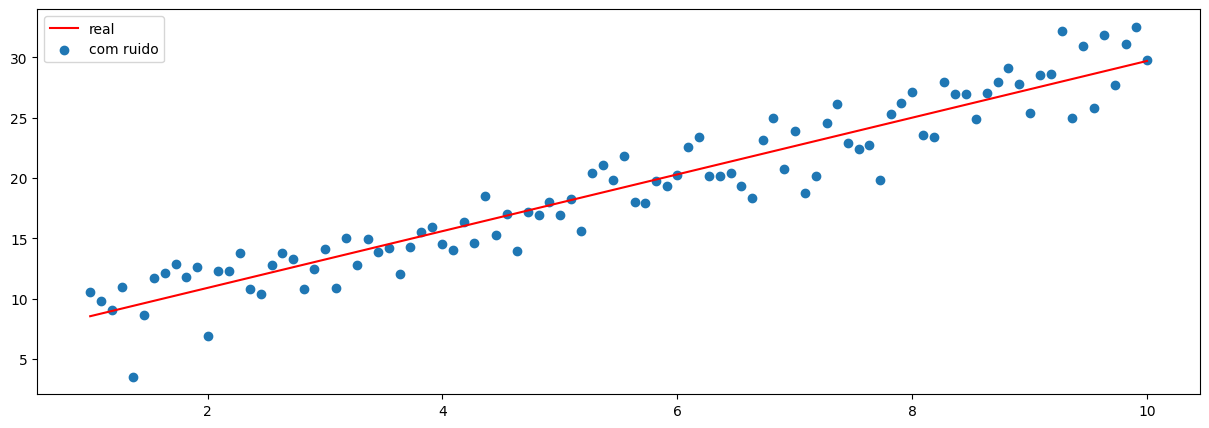

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(X, YY, color="red", label="real")
ax.scatter(X, Y, label="com ruido")
ax.legend()

# Treinando com método dos mínimos quadrados

- Concatenando em cada entrada de X para aplicar o trick matemático

In [7]:
X_1 = np.concatenate((X, np.ones([X.shape[0], 1])), axis=1)
X_1.shape

(100, 2)

- Aplicando a solução analítica

In [8]:
w = np.linalg.inv(np.dot(X_1.T, X_1)).dot(X_1.T).dot(Y)
w

array([[2.38165162],
       [6.02284019]])

- Realizando a predição

In [9]:
Y_hat = X_1.dot(w)
Y_hat.shape

(100, 1)

- Verificando o MSE:

In [ ]:
mse = np.sqrt((Y - Y_hat) ** 2).sum() / len(YY)
mse

- Atualizando o plot

In [ ]:
ax.plot(X, Y_hat, color="g", label="RSS")
ax.legend()
fig

# Treinando com gradiente descendente
- Definindo as constantes

In [ ]:
taxa_aprendizado = 0.01
max_epocas = 1000
tolerancia = 0.00001

- Gerando os pesos aleatoriamente atraves de uma distribuição normal

In [ ]:
w = np.random.randn(1, X_1.shape[1])
w

- Criando o loop de atualização dos pesos

In [ ]:
with tqdm(total=max_epocas, ascii=True, desc=f"Treinando", ncols=100) as t:
    for ep in range(max_epocas):
        
        # Fazendo a predicao
        Y_hat = X_1.dot(w.T)
        diff_Y = (Y - Y_hat)
        mse = np.sqrt(diff_Y ** 2).sum() / len(YY)
        
        # Calculando o gradiente
        grad = -(diff_Y * X_1).sum(axis=0) / len(diff_Y)
        
        # Atualizando
        w_ant = w.copy()
        w = w - taxa_aprendizado * grad
        
        # Verificando convergência
        if np.abs(w - w_ant).sum() < tolerancia:
            print("- O valor de w convergiu. Parando de treinar")
            print(w)
            break
        
        # Atualizando tqdm
        t.set_postfix(mse=f"{mse:.2f}")
        t.update()
        

- Verificando o valor de w

In [ ]:
w

- Refazendo o plot

In [ ]:
ax.plot(X, Y_hat, color="k", label="GD")
ax.legend()
fig

___
# Exercícios
1. Faça uma adaptação no código do Gradiente Descendente para implementar sua versão estocástica (SGD)
2. Pegue o modelo linear implementado neste notebook e crie uma classe para encapsular todo o código
___